In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer

In [3]:
hotel = pd.read_csv('hotel_bookings.csv')

In [4]:
# 결측치 평균괎으로 채워주기
hotel.iloc[:, 23].fillna(hotel.iloc[:, 23].mean(), inplace = True)
hotel.iloc[:, 10].fillna(hotel.iloc[:, 10].mean(), inplace = True)

In [5]:
# 상관계수 낮은 컬럼 drop
hotel.drop(['children', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'company', 'reservation_status_date'], axis = 1, inplace = True)

In [6]:
hotel.drop(['arrival_date_week_number'], axis = 1, inplace = True)

In [7]:
hotel.drop(['country'], axis = 1, inplace = True)

In [8]:
hotel.drop(['reservation_status'], axis = 1, inplace = True)

In [9]:
# X, y 나누기
X = (hotel.loc[:, hotel.columns != 'is_canceled'])
y = (hotel.loc[:, hotel.columns == 'is_canceled'])
X.shape, y.shape

((119390, 23), (119390, 1))

In [10]:
X.shape

(119390, 23)

In [11]:
encoder = LabelEncoder()
X['hotel'] = encoder.fit_transform(X['hotel'])
X['hotel']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 119390, dtype: int32

In [12]:
X['arrival_date_month'] = encoder.fit_transform(X['arrival_date_month'])
X['arrival_date_month']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         5
1         5
2         5
3         5
4         5
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: arrival_date_month, Length: 119390, dtype: int32

In [13]:
X['meal'] = encoder.fit_transform(X['meal'])
X['meal']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119390, dtype: int32

In [14]:
X['market_segment'] = encoder.fit_transform(X['market_segment'])
X['market_segment']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 119390, dtype: int32

In [15]:
X['distribution_channel'] = encoder.fit_transform(X['distribution_channel'])
X['distribution_channel']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         1
1         1
2         1
3         0
4         3
         ..
119385    3
119386    3
119387    3
119388    3
119389    3
Name: distribution_channel, Length: 119390, dtype: int32

In [16]:
X['reserved_room_type'] = encoder.fit_transform(X['reserved_room_type'])
X['reserved_room_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         0
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: reserved_room_type, Length: 119390, dtype: int32

In [17]:
X['assigned_room_type'] = encoder.fit_transform(X['assigned_room_type'])
X['assigned_room_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         2
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: assigned_room_type, Length: 119390, dtype: int32

In [18]:
X['deposit_type'] = encoder.fit_transform(X['deposit_type'])
X['deposit_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: deposit_type, Length: 119390, dtype: int32

In [19]:
X['customer_type'] = encoder.fit_transform(X['customer_type'])
X['customer_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: customer_type, Length: 119390, dtype: int32

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int32  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   babies                          119390 non-null  int64  
 7   meal                            119390 non-null  int32  
 8   market_segment                  119390 non-null  int32  
 9   distribution_channel            119390 non-null  int32  
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [21]:
# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# 데이터셋 나누기 - train/validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 1)

In [22]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1,
                    n_estimators = 200,
                    learning_rate = 0.3,
                    max_depth = 6)

In [23]:
xgb.fit(X_train, y_train)

c:\users\swl\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\swl\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# 예측
pred_train_xgb = xgb.predict(X_train)
pred_val_xgb = xgb.predict(X_val)
pred_test_xgb = xgb.predict(X_test)

In [25]:
X_train.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [32]:
best_params_

NameError: name 'best_params_' is not defined

In [ ]:
best_xgb = randomized_search.best_estimator_
best_rf

In [33]:
fi = xgb.feature_importances_
fi

array([0.00506723, 0.00651991, 0.00615049, 0.00326772, 0.00305029,
       0.00372168, 0.00227671, 0.00396764, 0.0226184 , 0.00396821,
       0.00378278, 0.06277426, 0.01052649, 0.00871876, 0.00689396,
       0.00851856, 0.66963154, 0.00755789, 0.00502208, 0.0147297 ,
       0.0035851 , 0.11445094, 0.02319964], dtype=float32)

In [34]:
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)

deposit_type                      0.669632
required_car_parking_spaces       0.114451
previous_cancellations            0.062774
total_of_special_requests         0.023200
market_segment                    0.022618
customer_type                     0.014730
previous_bookings_not_canceled    0.010526
reserved_room_type                0.008719
booking_changes                   0.008519
agent                             0.007558
assigned_room_type                0.006894
lead_time                         0.006520
arrival_date_year                 0.006150
hotel                             0.005067
days_in_waiting_list              0.005022
distribution_channel              0.003968
meal                              0.003968
is_repeated_guest                 0.003783
adults                            0.003722
adr                               0.003585
arrival_date_month                0.003268
stays_in_week_nights              0.003050
babies                            0.002277
dtype: floa

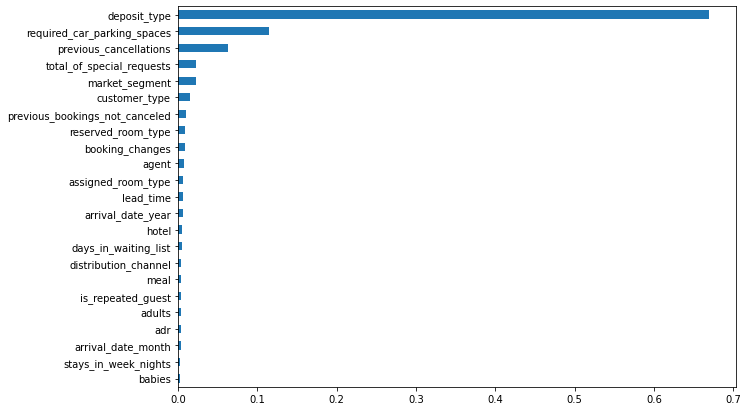

In [36]:
import matplotlib.pyplot as plt
fi_s.sort_values().plot(kind='barh', figsize=(10,7))
plt.show()

In [ ]:
# 라벨 인코딩함

In [26]:
xgb.feature_importances_

array([0.00506723, 0.00651991, 0.00615049, 0.00326772, 0.00305029,
       0.00372168, 0.00227671, 0.00396764, 0.0226184 , 0.00396821,
       0.00378278, 0.06277426, 0.01052649, 0.00871876, 0.00689396,
       0.00851856, 0.66963154, 0.00755789, 0.00502208, 0.0147297 ,
       0.0035851 , 0.11445094, 0.02319964], dtype=float32)

In [28]:
np.sort(xgb.feature_importances_)

array([0.00227671, 0.00305029, 0.00326772, 0.0035851 , 0.00372168,
       0.00378278, 0.00396764, 0.00396821, 0.00502208, 0.00506723,
       0.00615049, 0.00651991, 0.00689396, 0.00755789, 0.00851856,
       0.00871876, 0.01052649, 0.0147297 , 0.0226184 , 0.02319964,
       0.06277426, 0.11445094, 0.66963154], dtype=float32)

In [ ]:
# 0.66963154 - deposit_type
# 0.11445094 - 'required_car_parking_spaces'
# 0.06277426 - 'previous_cancellations'

In [29]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(XGBClassifier(n_estimators = 200,
                          max_depth = 6,
                          learning_rate = 0.3,
                          random_state = 1))

In [30]:
model.fit(X_train, y_train)

[15:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d117db3a88>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d117e25f08>})

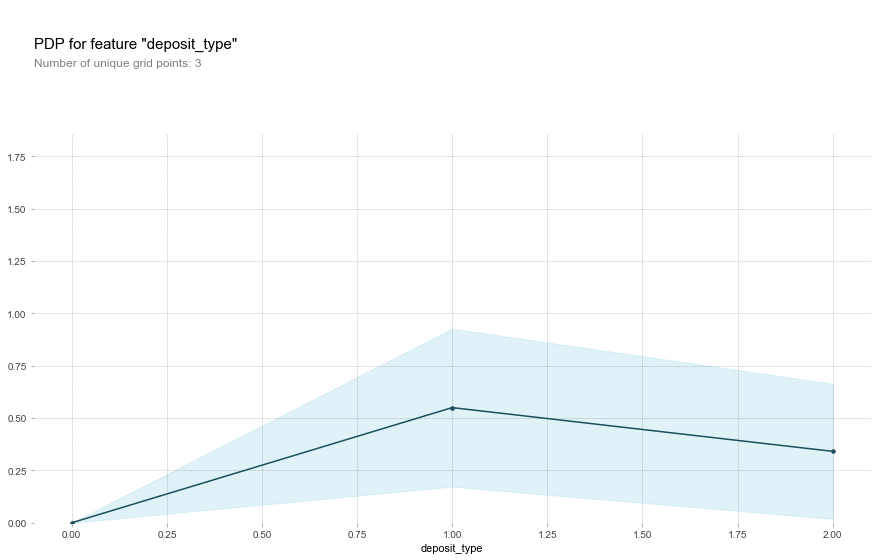

In [35]:
# pdp - deposit_type
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'deposit_type'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d118070e08>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d1181064c8>})

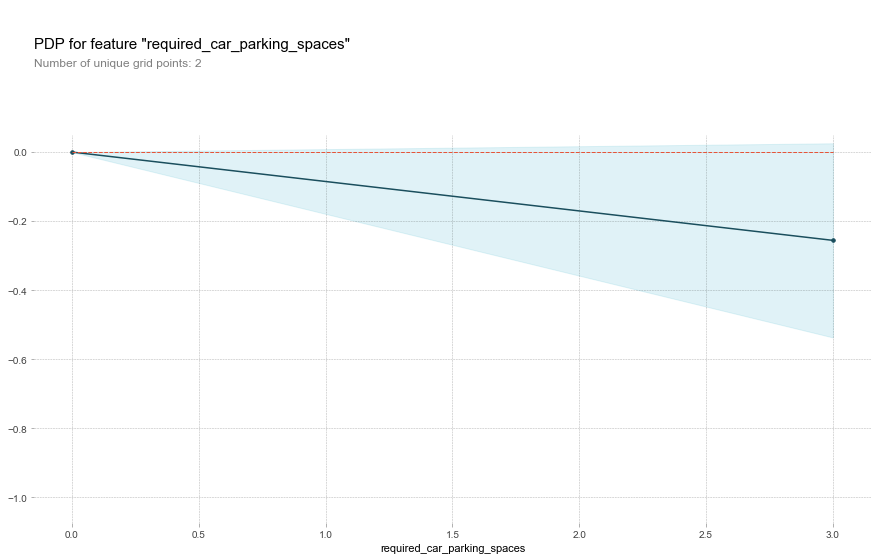

In [36]:
# pdp  - 'required_car_parking_spaces'
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'required_car_parking_spaces'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d118179b08>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d118ede108>})

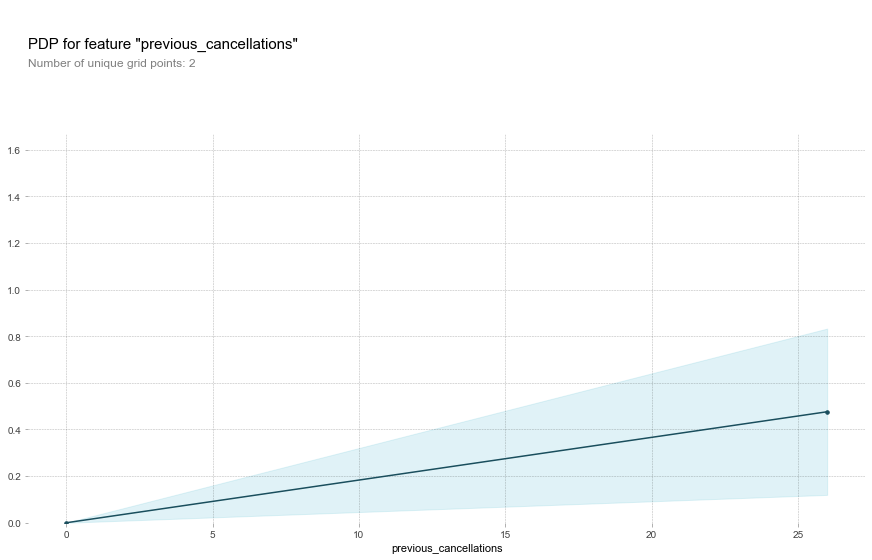

In [37]:
# pdp  - 'previous_cancellations'
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'previous_cancellations'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)